In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# Read the data and create DataFrame from it
data = pd.read_csv('16.csv', sep=';').replace(['DZN', 'Makula', 'SoftExudates', 'Vessels'], [0, 1, 2, 3])

In [3]:
# Check a few rows of the table
data.head()

,Unnamed: 0,name,area,class,gray_Mean,gray_Variance,gray_Skewness,gray_Kurtosis,gray_Perc.01%,gray_Perc.10%,...,"b_S(5,-5)SumVarnc","b_S(5,-5)SumEntrp","b_S(5,-5)Entropy","b_S(5,-5)DifVarnc","b_S(5,-5)DifEntrp",b_GrMean,b_GrVariance,b_GrSkewness,b_GrKurtosis,b_GrNonZeros
0,504914,25-May-2012 12-44-02,100,0,"162,87","25,6731","0,0556933442808038","-0,847312470433456","153,0","156,0",...,"19020,2920239063","1,0185245113550199","1,59059920589699","37,6861925522195","1,00034500883477","4,04366697163015","4,68000742254742","0,469840716855728","-0,739006133152813","1,0"
1,504915,25-May-2012 12-44-02,100,0,"163,22","34,0916","-0,184628743255271","-1,17512428138866","152,0","155,0",...,"18872,185673506498","1,12394386122761","1,62672280537666","27,945501012950896","0,861753508048933","4,51488268129824","4,38145937411324","0,139565167526377","-0,8441575745042179","1,0"
2,504916,25-May-2012 12-44-02,100,0,"166,02","36,3396","-0,213090557717068","-1,34859723534067","155,0","158,0",...,"18936,2296403973","0,9450748123142929","1,50017250441739","34,9389659370051","0,9521802095285329","3,42635982214587","2,77568336918453","0,258781983309002","-0,45019100421053404","0,96875"
3,504917,25-May-2012 12-44-02,100,0,"163,57","32,7051","-0,23953206151099998","-0,7412659193903579","151,0","155,0",...,"19341,6490470399","1,0185245113550199","1,5694682548103003","21,2180474577127","0,793004206059718","3,5684615219362903","3,68795736646017","0,44332061765059905","0,0231065255473104","0,953125"
4,504918,25-May-2012 12-44-02,100,0,"162,73","35,4571","-0,0356651425692793","-1,45781568758918","153,0","155,0",...,"18475,989997983","0,9944421117018969","1,63876400520322","45,426724314094706","0,9944421117018969","4,28622945998813","4,92511201632983","-0,0128182902511431","-1,1049856517508898","1,0"


In [4]:
y = data['class']
print(y.value_counts())

0    6004
1    3517
2    2454
3    1079
Name: class, dtype: int64


In [5]:
Y = data.pop('class')
#даже если переводить всё это дело в таймстамп, получается так себе
data.pop('name')
X = data

In [6]:
#форматируем всю х***ю
#datePattern = '%d-%B-%Y %H-%M-%S'
cols = X.columns
#for index, row in x.head().iterrows():
for index, row in X.iterrows():
    #мутирущий код зло, но мне лень -_-
    #if (isinstance(x.at[index, 'name'], str)):
    #    trueDate = datetime.strptime(x.at[index, 'name'], datePattern)
    #    x.at[index, 'name'] = datetime.timestamp(trueDate)
    
    for col in cols:
        if (isinstance(X.at[index, col], str)):
            X.at[index, col] = X.at[index, col].replace(',', '.', 1)

In [7]:
#меням тип
for col in cols:
    X[col] = pd.to_numeric(X[col])

In [8]:
#сдвигаем отрицательные
for col in cols:
    minColVal = X[col].min()
    if (minColVal < 0):
        for index, row in X.iterrows():
            X.at[index, col] -= minColVal

In [9]:
best_features = SelectKBest(score_func=f_classif, k=30)
fit = best_features.fit(X.values, Y.values.ravel())
best_features = pd.DataFrame(data=fit.scores_, index=X.columns, columns=['f_classif_score'])
best_features.nlargest(21, 'f_classif_score')

,f_classif_score
r_Perc.99%,19590.462639
r_Perc.90%,18768.726781
"r_S(4,4)SumAverg",16877.990285
"r_S(5,5)SumAverg",16870.064458
"r_S(3,3)SumAverg",16865.631711
"r_S(3,0)SumAverg",16840.614432
"r_S(2,2)SumAverg",16839.491911
"r_S(4,0)SumAverg",16835.554328
"r_S(2,0)SumAverg",16827.477189
"r_S(2,-2)SumAverg",16819.923021


In [10]:
X = data.iloc[:, 4:]
Y = data.iloc[:, 3:4] 
selected_x = X[best_features.nlargest(30, 'f_classif_score').index]
X = (selected_x.values - selected_x.values.mean(axis=0))/selected_x.values.std(axis=0)
X.shape

(13054, 30)

In [11]:
from sklearn.metrics import pairwise_distances

def plot_cost(cost):
    fig = plt.figure()
    fig.set_size_inches(14, 7)
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.plot(cost)
    
    
def k_means(X, K, metric="euclidean", max_iter=20):
    N, D = X.shape
    L = np.zeros(N)
    M = np.zeros((K, D))
    

    for k in range(K):
        M[k] = X[np.random.choice(N)]
    
    for i in range(max_iter):
        dists = []
        for k in range(K):
            dists += [pairwise_distances(X, [M[k]], metric).reshape(-1, 1)]
        dists = np.hstack(dists)
        L = np.argmin(dists, axis=1)
        for k in range(K):
            M[k] = X[L==k].mean(axis=0)
    return M, L


def cluster_resp(distances):
    d_exp = np.exp(-distances)
    return d_exp / np.sum(d_exp, axis=1, keepdims=True)


def soft_k_means(X, K, metric="euclidean", max_iter=20):
    N, D = X.shape
    R = np.zeros((N, K))
    M = np.zeros((K, D))
    
    for k in range(K):
        M[k] = X[np.random.choice(N)]
    
    for i in range(max_iter):
        dists = []
        for m in range(K):
            dists += [pairwise_distances(X, [M[m]], metric).reshape(-1, 1)]
        dists = np.hstack(dists)
        R = cluster_resp(dists)
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()
            
    return M, R

In [12]:
from sklearn.metrics.cluster import contingency_matrix
from sklearn.utils import shuffle
from scipy.spatial.distance import euclidean, chebyshev, cityblock


def metrics_purity(class_labels, cluster_labels):    
    c_m = contingency_matrix(class_labels, cluster_labels)
    return np.sum(np.amax(c_m, axis=0)) / np.sum(c_m)

def metrics_davies_bouldin(X, cluster_labels, distance=euclidean):
    n_cluster = len(np.bincount(cluster_labels))
    cluster_k = [X[cluster_labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]
    variances = [np.mean([distance(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    db = []

    for i in range(n_cluster):
        for j in range(n_cluster):
            if j != i:
                db.append([(variances[i] + variances[j]) / distance(centroids[i], centroids[j])])

    return(np.max(db) / n_cluster)

In [13]:
def plot_result(result, title="Accuracy"):
    fig = plt.figure()
    fig.set_size_inches(10, 5)
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.set_title(title)
    pt = axes.plot(range(2,20), result)

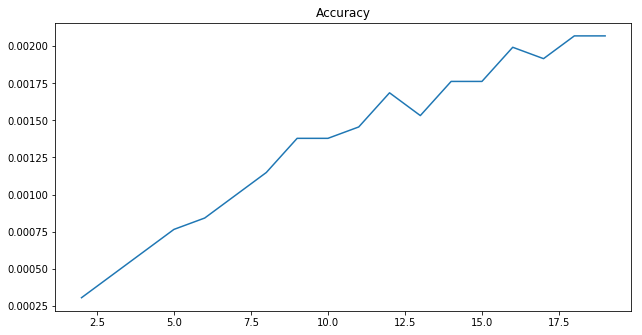

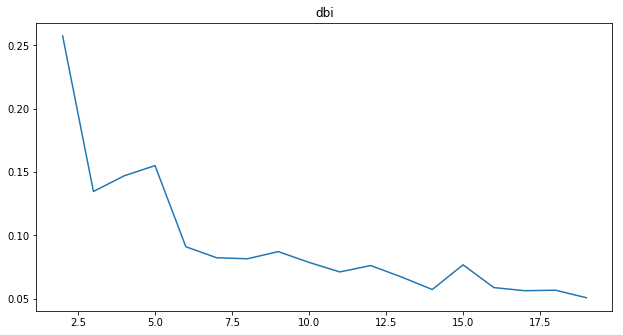

In [14]:
## K means
## euclidean metric
accuracy = [];
dbi = [];
for i in range(2,20):
    M, L = k_means(X, K=i, metric="euclidean")
    accuracy = np.append(accuracy,metrics_purity(Y, L))
    dbi = np.append(dbi,metrics_davies_bouldin(X, L, distance=euclidean))
plot_result(accuracy)
plot_result(dbi, "dbi")

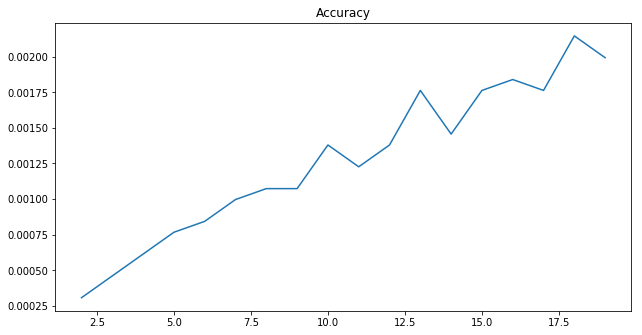

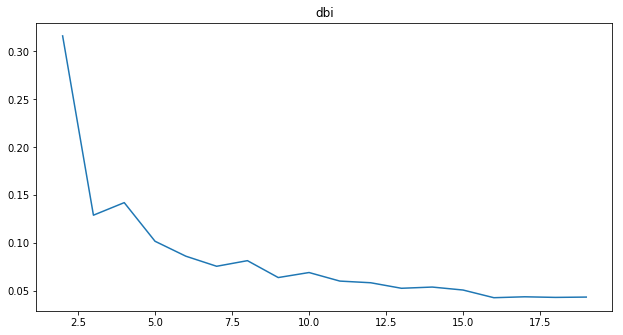

In [15]:
## manhattan metric
accuracy = [];
dbi = [];
for i in range(2,20):
    M, L = k_means(X, K=i, metric="manhattan")
    accuracy = np.append(accuracy, metrics_purity(Y, L))
    dbi = np.append(dbi,metrics_davies_bouldin(X, L, distance=cityblock))
plot_result(accuracy)
plot_result(dbi, "dbi")

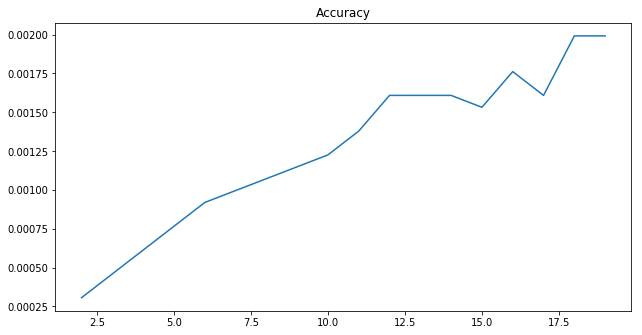

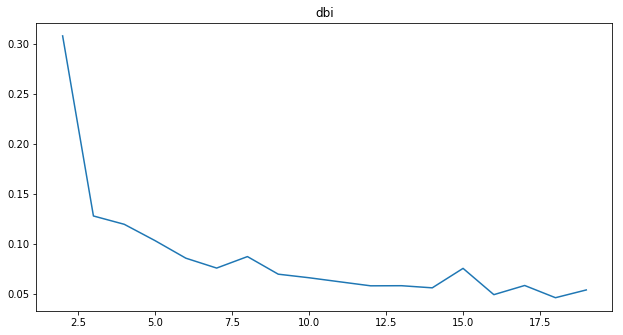

In [17]:
## manhattan metric
accuracy = [];
dbi = [];
for i in range(2,20):
    M, R = soft_k_means(X, K=i, metric="manhattan", max_iter=5)
    buf = np.amax(R, axis=1);
    L = [];
    for m in range(buf.size):
        L.append(np.where(R[m] == buf[m]))
    L = np.array(L[:]).reshape(-1)
    accuracy = np.append(accuracy,metrics_purity(Y, L))
    dbi = np.append(dbi, metrics_davies_bouldin(X, L, distance=cityblock))
plot_result(accuracy)
plot_result(dbi, "dbi")

/home/akakyi/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/akakyi/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/akakyi/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


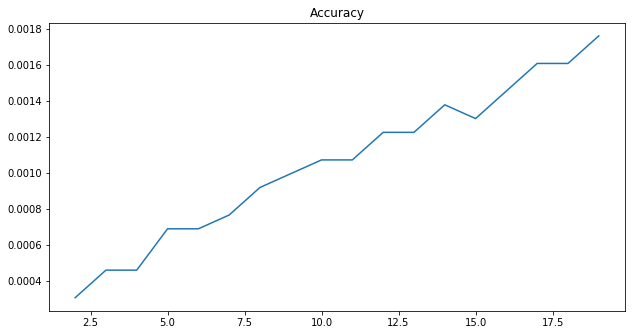

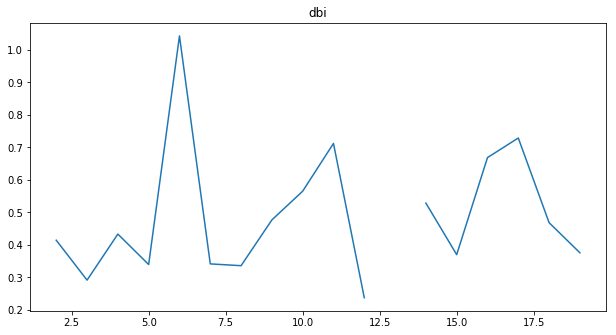

In [18]:
## chebyshev metric
accuracy = [];
dbi = [];
for i in range(2,20):
    M, R = soft_k_means(X, K=i, metric="chebyshev", max_iter=5)
    buf = np.amax(R, axis=1);
    L = [];
    for m in range(buf.size):
        L.append(np.where(R[m] == buf[m]))
    L = np.array(L[:]).reshape(-1)
    accuracy = np.append(accuracy,metrics_purity(Y, L))
    dbi = np.append(dbi, metrics_davies_bouldin(X, L, distance=chebyshev))
plot_result(accuracy)
plot_result(dbi, "dbi")